In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
# import gftt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors, cm
from matplotlib.colors import ListedColormap
import rasterio
from rasterio.plot import show
import numpy as np
import pandas as pd
import geopandas as gpd

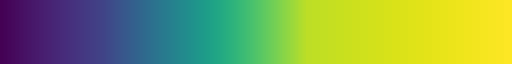

In [3]:
viridis = cm.get_cmap('viridis', 256)
newcolors1 = viridis(np.linspace(0, 0.2, 128))
newcolors2 = viridis(np.linspace(0.2, 0.9, 256))
newcolors3 = viridis(np.linspace(0.9, 1, 256))
newcolors = np.vstack((newcolors1, newcolors2, newcolors3))
cmap = ListedColormap(newcolors)
cmap.set_over(np.array([202,0,32,128]) / 255)
cmap.set_under(np.array([0,0,0,128]) / 255)
cmap

In [4]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df

Date Chip (px) Resolution (px) Prefilter  \
0    Sen2-20180304-20180314        48              12       Gau   
1    Sen2-20180304-20180314        48              12      NAOF   
2    Sen2-20180304-20180314        48              12      None   
3    Sen2-20180304-20180314        48               1       Gau   
4    Sen2-20180304-20180314        48               1      NAOF   
..                      ...       ...             ...       ...   
167  Sen2-20180508-20180627        64               8       Gau   
168  Sen2-20180508-20180627        32               4      NAOF   
169  Sen2-20180508-20180627        32               8      NAOF   
170  Sen2-20180508-20180627        64               4      NAOF   
171  Sen2-20180508-20180627        64               8      NAOF   

                 Subpixel  Software  \
0    16-node oversampling     CARST   
1    16-node oversampling     CARST   
2    16-node oversampling     CARST   
3    16-node oversampling     CARST   
4    16-node oversampling     CARST   
..                    ...       ...   
167                 pyrUP  autoRIFT   
168                 pyrUP  autoRIFT   
169                 pyrUP  autoRIFT   
170                 pyrUP  autoRIFT   
171                 pyrUP  autoRIFT   

                                                    Vx  \
0    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
1    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
2    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
3    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
4    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
..                                                 ...   
167  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
168  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
169  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
170  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
171  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   

                                                    Vy                OIE-x  \
0    /home/jovyan/Projects/PX_comparison/PX/CARST/2...            0.5234375   
1    /home/jovyan/Projects/PX_comparison/PX/CARST/2...             0.421875   
2    /home/jovyan/Projects/PX_comparison/PX/CARST/2...           0.82421875   
3    /home/jovyan/Projects/PX_comparison/PX/CARST/2...              0.59375   
4    /home/jovyan/Projects/PX_comparison/PX/CARST/2...              0.40625   
..                                                 ...                  ...   
167  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.34062498807907104   
168  /home/jovyan/Projects/PX_comparison/PX/autoRIF...                 0.25   
169  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.16249999403953552   
170  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.17499999701976776   
171  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.13750000298023224   

                   OIE-y            OI-peak-x              OI-peak-y  \
0               0.546875           -0.0703125              0.1953125   
1              0.4296875              -0.0625              0.1640625   
2             0.92578125  -0.0416666679084301     0.1354166716337204   
3               0.578125              -0.0625                 0.1875   
4                0.46875              -0.0625                0.15625   
..                   ...                  ...                    ...   
167   0.5375000238418579  0.05000000074505806   -0.05000000074505806   
168  0.33125001192092896  0.03750000149011612  -0.012500000186264515   
169  0.24687500298023224  0.03750000149011612   -0.02500000037252903   
170   0.2562499940395355  0.03750000149011612  -0.012500000186264515   
171              0.21875  0.03750000149011612  -0.012500000186264515   

       slope_max-normal-E    slope_min-shear-E              E_ratio  \
0     0.07121240778955427   0.1476625221583858   0.4822646041029315   
1    0.057825730765264476  0.10187571345771824   0.5676105599914552   
2     0.08011465048394165

In [5]:
df['E_ratio'] = df['E_ratio'].astype(float)

In [32]:
# demo = df.loc[df['Date'] == 'LS8-20180304-20180405']
# demo = df.loc[np.logical_and(df['Date'] == 'LS8-20180304-20180405', df['Subpixel'] != 'affine')]
# demo = df.loc[df['Date'] == 'LS8-20180802-20180818']
demo = df.loc[np.logical_and(df['Date'] == 'LS8-20180802-20180818', df['Subpixel'] != 'affine')]
# demo = df.loc[df['Date'] == 'Sen2-20180304-20180314']
# demo = df.loc[np.logical_and(df['Date'] == 'Sen2-20180304-20180314', df['Subpixel'] != 'affine')]
# demo = df.loc[df['Date'] == 'Sen2-20180508-20180627']
# demo = df.loc[np.logical_and(df['Date'] == 'Sen2-20180508-20180627', df['Subpixel'] != 'affine')]
# There are 43-1 tests
demo

Date Chip (px) Resolution (px) Prefilter  \
54   LS8-20180802-20180818        32               1       Gau   
55   LS8-20180802-20180818        32               1      NAOF   
56   LS8-20180802-20180818        32               1      None   
57   LS8-20180802-20180818        32               4       Gau   
58   LS8-20180802-20180818        32               4      NAOF   
59   LS8-20180802-20180818        32               4      None   
60   LS8-20180802-20180818        32               8       Gau   
61   LS8-20180802-20180818        32               8      NAOF   
62   LS8-20180802-20180818        32               8      None   
63   LS8-20180802-20180818        64               1       Gau   
64   LS8-20180802-20180818        64               1      NAOF   
65   LS8-20180802-20180818        64               1      None   
66   LS8-20180802-20180818        64               4       Gau   
67   LS8-20180802-20180818        64               4      NAOF   
68   LS8-20180802-20180818        64               4      None   
69   LS8-20180802-20180818        64               8       Gau   
70   LS8-20180802-20180818        64               8      NAOF   
71   LS8-20180802-20180818        64               8      None   
78   LS8-20180802-20180818     multi              16      NAOF   
79   LS8-20180802-20180818     multi               4      NAOF   
80   LS8-20180802-20180818     multi              16       Gau   
81   LS8-20180802-20180818     multi               4       Gau   
82   LS8-20180802-20180818     multi              16      None   
83   LS8-20180802-20180818     multi               4      None   
98   LS8-20180802-20180818        31               1       Gau   
99   LS8-20180802-20180818        65               1       Gau   
106  LS8-20180802-20180818        31               1      None   
107  LS8-20180802-20180818        65               1      None   
115  LS8-20180802-20180818        31               1       LoG   
116  LS8-20180802-20180818        31               1       LoG   
136  LS8-20180802-20180818        32               4      None   
137  LS8-20180802-20180818        32               8      None   
138  LS8-20180802-20180818        64               4      None   
139  LS8-20180802-20180818        64               8      None   
140  LS8-20180802-20180818        32               4       Gau   
141  LS8-20180802-20180818        32               8       Gau   
142  LS8-20180802-20180818        64               4       Gau   
143  LS8-20180802-20180818        64               8       Gau   
144  LS8-20180802-20180818        32               4      NAOF   
145  LS8-20180802-20180818        32               8      NAOF   
146  LS8-20180802-20180818        64               4      NAOF   
147  LS8-20180802-20180818        64               8      NAOF   

                  Subpixel  Software  \
54    16-node oversampling     CARST   
55    16-node oversampling     CARST   
56    16-node oversampling     CARST   
57    16-node oversampling     CARST   
58    16-node oversampling     CARST   
59    16-node oversampling     CARST   
60    16-node oversampling     CARST   
61    16-node oversampling     CARST   
62    16-node oversampling     CARST   
63    16-node oversampling     CARST   
64    16-node oversampling     CARST   
65    16-node oversampling     CARST   
66    16-node oversampling     CARST   
67    16-node oversampling     CARST   
68    16-node oversampling     CARST   
69    16-node oversampling     CARST   
70    16-node oversampling     CARST   
71    16-node oversampling     CARST   
78   interest point groups       GIV   
79   interest point groups       GIV   
80   interest point groups       GIV   
81   interest point groups       GIV   
82   interest point groups       GIV   
83   interest point groups       GIV   
98               parabolic      Vmap   
99               parabolic      Vmap   
106              parabolic      Vmap   
107              parabolic      Vmap   
115              parabo

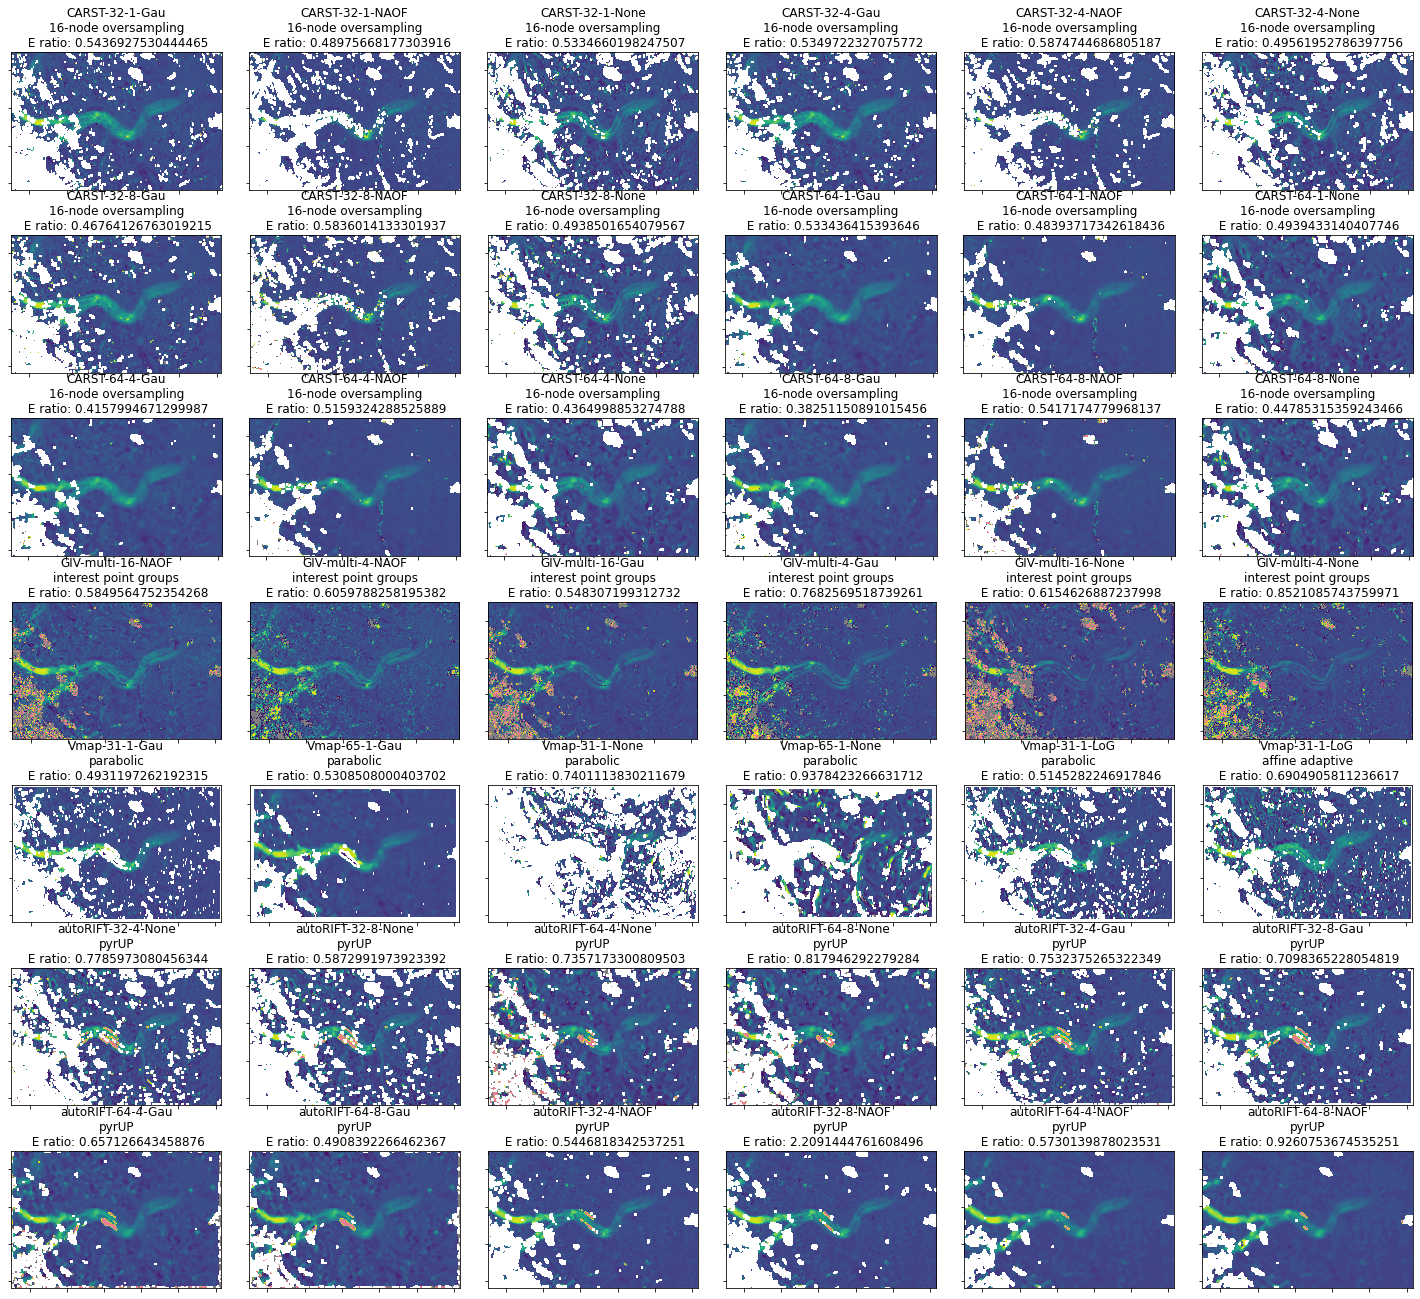

In [33]:
fig, ax3 = plt.subplots(7, 6, figsize=(20, 18))

n = 0

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel + '\n E ratio: {}'.format(row.E_ratio)
    ax_sel = ax3[n // 6, n % 6]
    
    with rasterio.open(row.Vx) as vx_src:
        show(vx_src, ax=ax_sel, vmin=-0.5, vmax=2, cmap=cmap)
    ax_sel.set_title(label)
    ax_sel.xaxis.set_ticklabels([])
    ax_sel.yaxis.set_ticklabels([])
        
    n += 1
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('tmp.png')

In [34]:
# demo2 = demo.loc[np.logical_or(demo['E_ratio'] > 0.8 , demo['E_ratio'] < 0.45)]
demo2 = demo.loc[demo['Software'] == 'GIV']
demo2 = demo2.sort_values(by=['E_ratio'])
demo2

Date Chip (px) Resolution (px) Prefilter  \
80  LS8-20180802-20180818     multi              16       Gau   
78  LS8-20180802-20180818     multi              16      NAOF   
79  LS8-20180802-20180818     multi               4      NAOF   
82  LS8-20180802-20180818     multi              16      None   
81  LS8-20180802-20180818     multi               4       Gau   
83  LS8-20180802-20180818     multi               4      None   

                 Subpixel Software  \
80  interest point groups      GIV   
78  interest point groups      GIV   
79  interest point groups      GIV   
82  interest point groups      GIV   
81  interest point groups      GIV   
83  interest point groups      GIV   

                                                   Vx  \
80  /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...   
78  /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...   
79  /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...   
82  /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...   
81  /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...   
83  /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...   

                                                   Vy                OIE-x  \
80  /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...  0.13179707817378483   
78  /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...  0.19976005820210585   
79  /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...  0.35642746725218655   
82  /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...  0.37927234728945547   
81  /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...  0.22440611297163765   
83  /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...  0.28179917934703325   

                  OIE-y             OI-peak-x               OI-peak-y  \
80  0.12640376363476258  0.030437282061943627    -0.01028063448772043   
78   0.2196435618183573  0.059131150196932714   -0.007235553023872132   
79  0.35900018158445374  0.031766716830049224   0.0020364321598012602   
82   0.3853822126172901  0.029802549953853452    -0.03024678126823721   
81  0.21965735907681305  0.022260775423761647  -0.0043621170697660805   
83   0.3429577148902264   0.02581682718746009   -0.010256598938121475   

      slope_max-normal-E     slope_min-shear-E   E_ratio  \
80  0.030221794425469836  0.055118361501273236  0.548307   
78  0.038472953078017375   0.06577062517776763  0.584956   
79    0.1656849005339854    0.2734169800568687  0.605979   
82   0.02566256002709901  0.041696370059916915  0.615463   
81   0.08958837344354509   0.11661251255198128  0.768257   
83   0.08336241786231999   0.09783074642027474  0.852109   

            pt0_velodiff          pt1_velodiff pt2_velodiff  
80   -0.5525996737039552  -0.36584754051224966          NaN  
78    -0.356108698929577   -0.2164661010031761          NaN  
79    -0.388083081426158  -0.09760913648678099          NaN  
82   -0.5534357434657624   -0.4430330232202381          NaN  
81   -0.4689091658878318  -0.48650286098405804          NaN  
83  -0.45974704116763565   -0.5186511692503872          NaN

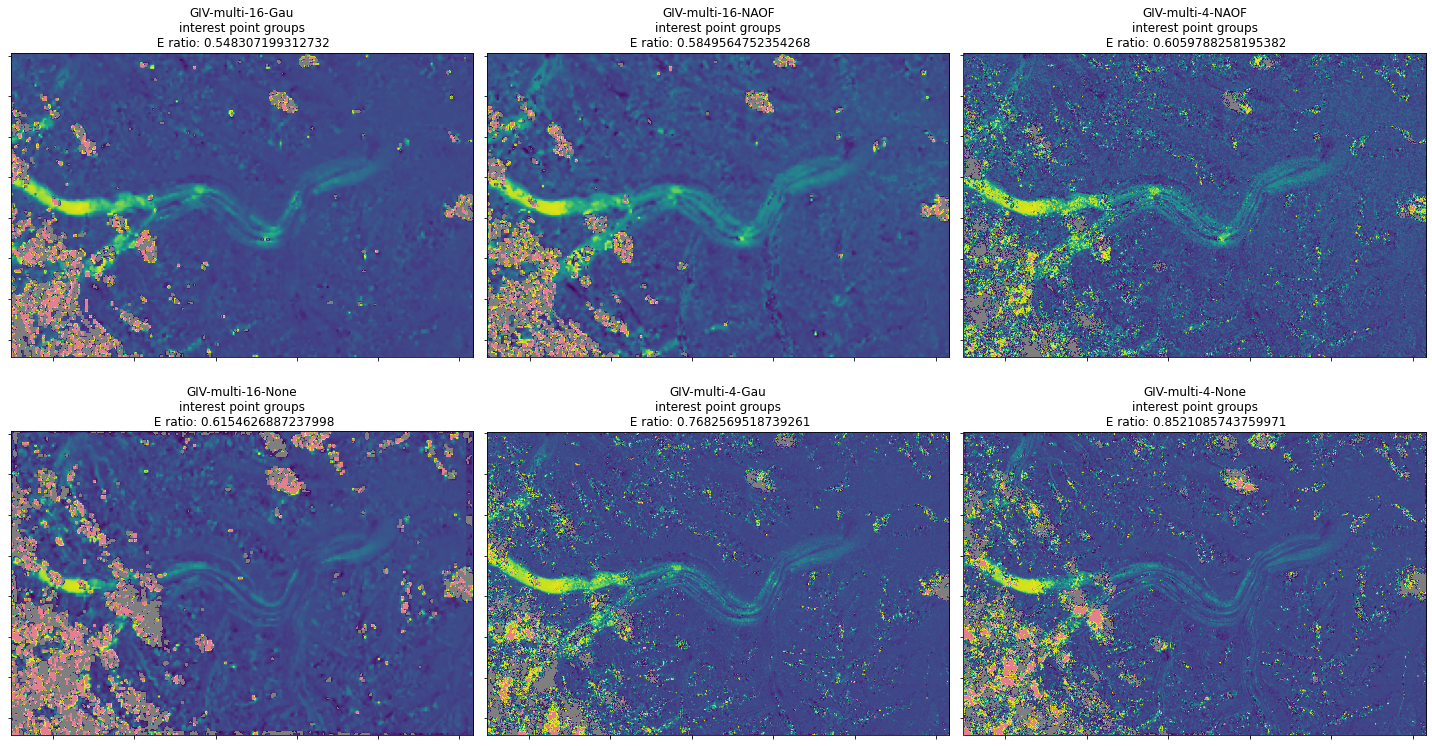

In [43]:
fig, ax4 = plt.subplots(2, 3, figsize=(20, 11))

n = 0

for idx, row in demo2.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel + '\n E ratio: {}'.format(row.E_ratio)
    ax_sel = ax4[n // 3, n % 3]
    
    with rasterio.open(row.Vx) as vx_src:
        show(vx_src, ax=ax_sel, vmin=-0.5, vmax=2, cmap=cmap)
    ax_sel.set_title(label)
    ax_sel.xaxis.set_ticklabels([])
    ax_sel.yaxis.set_ticklabels([])
        
    n += 1
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
fig.savefig('tmp2.png')